# Advent of Code
Charel Felten

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

## 1. Advent

In [130]:
df = pd.read_csv("inputs/1", header=None)

f = lambda w: (df.rolling(w).sum().dropna().diff().fillna(0) > 0).sum().loc[0]

print(f"Task 1: {f(1)}, Task 2: {f(3)}")

Task 1: 1266, Task 2: 1217


## 2. Advent

In [131]:
df = pd.read_csv("inputs/2", header=None, sep=" ", names=["direction", "distance"])

t1 = df.groupby("direction").sum().apply(lambda col: (col["down"] - col["up"]) * col["forward"]).loc["distance"]

h, d, a = 0,0,0
for _, (dir, dis) in df.iterrows():
    if dir == "down": a += dis
    if dir == "up": a -= dis
    if dir == "forward":
        h += dis
        d += a*dis
        
print(f"Task 1: {t1}, Task 2: {h * d}")

Task 1: 1882980, Task 2: 1971232560


In [132]:
def f(hda, dirdis):
    h, d, a = hda
    _, (dir, dis) = dirdis
    if dir == "down": a += dis
    if dir == "up": a -= dis
    if dir == "forward":
        h += dis
        d += a*dis
    return (h,d,a)

h, d, a = reduce(f, df.iterrows(), (0,0,0))

print(f"Task 2 Alt: {h * d}")

Task 2 Alt: 1971232560


## 3. Advent

In [133]:
df = pd.read_csv("inputs/3", header=None, sep=" ", dtype="str")

t1 = df\
    .apply(lambda r: list(r.iloc[0]), result_type="expand", axis=1)\
    .agg(["median", lambda c: int(not(c.median()))])\
    .apply(lambda c: 2**((len(df.iloc[0,0])-1)-c.name) * c)\
    .sum(axis=1).prod().astype(int)

t2 = df.apply(lambda r: list(r.iloc[0]), result_type="expand", axis=1).astype(int)

def x(t2, b):
    for c in t2: t2 = t2[t2[c] == t2.groupby(c).size().sort_index(ascending=b).sort_values(ascending=b).index[0]]
    return t2.apply(lambda c: 2**((len(df.iloc[0,0])-1)-c.name) * c).sum(axis=1).iloc[0]

t2 = x(t2, False) * x(t2, True)

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 4147524, Task 2: 3570354


## 4. Advent

In [134]:
inputs = pd.read_csv("inputs/4", header=None, nrows=1, engine="python").to_numpy().reshape(-1)
boards = pd.read_csv("inputs/4", header=None, skiprows=[0], sep=r" +", engine="python").to_numpy().reshape(-1, 5, 5)
bingos = np.zeros_like(boards, dtype=bool)

aw = {}
for inp in inputs:
    for match in np.argwhere(boards == inp):
        bingos[tuple(match)] = True
    
    hs = np.argwhere(bingos.sum(axis=1) == boards.shape[1])
    vs = np.argwhere(bingos.sum(axis=2) == boards.shape[1])
    
    nw = set(list(vs[:,0]) + list(hs[:,0]))

    if len(nw) == 1 and len(aw) == 0:
        w = (nw - aw).pop()
        t1 = inp * boards[w, ~bingos[w]].sum()

    if len(nw) == boards.shape[0]:
        l = (nw - aw).pop()
        t2 = inp * boards[l, ~bingos[l]].sum()
        break

    aw = nw

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 34506, Task 2: 7686


## 5. Advent

In [135]:
df = pd.read_csv("inputs/5", header=None, sep=r",| -> ", names=["x1", "y1", "x2", "y2"], engine="python")

M = np.zeros(shape=[2] + [df.max().max() + 1] * 2)

for _, (x1,y1,x2,y2) in df.iterrows():
    sx = 1 if x2-x1 > 0 else -1
    sy = 1 if y2-y1 > 0 else -1
    if x1 == x2 or y1 == y2:
        for x in range(x1, x2 + sx, sx):
            for y in range(y1, y2 + sy, sy):
                M[:,y,x] += 1
    else:
        for x,y in zip(range(x1, x2 + sx, sx), range(y1, y2 + sy, sy)):
            M[1,y,x] += 1

print(f"Task 1: {np.sum(M[0] > 1)}, Task 2: {np.sum(M[1] > 1)}")

Task 1: 8622, Task 2: 22037


In [136]:
from itertools import zip_longest as zipl

df = pd.read_csv("inputs/5", header=None, sep=r",| -> ", names=["x1", "y1", "x2", "y2"], engine="python")

M = np.zeros(shape=[2] + [df.max().max() + 1] * 2)

for _, (x1,y1,x2,y2) in df.iterrows():
    for x,y in zipl(range(x1, x2 + (1 if x2-x1 > 0 else -1), (1 if x2-x1 > 0 else -1)), range(y1, y2 + (1 if y2-y1 > 0 else -1), (1 if y2-y1 > 0 else -1))):
        M[:, y if y is not None else y1, x if x is not None else x1] += (x1 == x2 or y1 == y2, 1)

print(f"Task 1: {np.sum(M[0] > 1)}, Task 2: {np.sum(M[1] > 1)}")

Task 1: 8622, Task 2: 22037


## 6. Advent

In [137]:
s = np.array([list(pd.read_csv("inputs/6", header=None).to_numpy().reshape(-1)).count(i) for i in range(9)])

def f(D, s):
    for _ in range(D):
        s = np.roll(s, -1)
        s[6] += s[8]
    return sum(s)

print(f"Task 1: {f(80, s)}, Task 2: {f(256, s)}")

Task 1: 390923, Task 2: 1749945484935


In [138]:
# Source: https://old.reddit.com/r/adventofcode/comments/r9z49j/2021_day_6_solutions/hnfi3nf/

TM = np.matrix([
    [0,1,0,0,0,0,0,0,0],  # this is a transition matrix, so each row encode the prob of transition
    [0,0,1,0,0,0,0,0,0],  # e.g. this row (row 1) has a 1 at col 2, which indicates that there
    [0,0,0,1,0,0,0,0,0],  # is a 100% chance (probability 1) to move from age 2 (col 2) to age 1 (row 1)
    [0,0,0,0,1,0,0,0,0],  # and a 0% chance for all other transitions.
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,0,0,1,0,0],
    [1,0,0,0,0,0,0,1,0],  # Fish being reset move from age 0 (col 0) to age 6 (col 6), but so do also
    [0,0,0,0,0,0,0,0,1],  # fish of age 7 (col 7) who move to age 6 (row 6). So two `1`s in this row.
    [1,0,0,0,0,0,0,0,0],  # New fish born move from age 0 (col 0) moves to age 8 (row 8)
])

print(f"Task 1: {np.sum(np.array(TM ** 80)*s)}, Task 2: {np.sum(np.array(TM ** 256)*s)}")

TMTM = np.matrix([
    [0,0,1,0,0,0,0,0,0],  # doing matrix multiplcation, which is the same as power 2, we get the state
    [0,0,0,1,0,0,0,0,0],  # of the matrix after 2 timesteps. Again we can read the fish ages
    [0,0,0,0,1,0,0,0,0],  # e.g. a fish originally aged 4 years (col 4), has a 100% chance to be
    [0,0,0,0,0,1,0,0,0],  # age 2 (row 2) after 2 iterations, which is indeed true
    [0,0,0,0,0,0,1,0,0],
    [1,0,0,0,0,0,0,1,0],  # there are two fish in this row, meaning that there are now 2 fish that are age 5 (row 5)
    [0,1,0,0,0,0,0,0,1],  # after 2 iterations, with one of them starting at age 0 (col 0) (0 -reset-> 6 -> 5)
    [1,0,0,0,0,0,0,0,0],  # and the other one being of age 7 (col 7) and simply aging normally (7 -> 6 -> 5)
    [0,1,0,0,0,0,0,0,0]
])

assert(np.all(TMTM == TM @ TM))

Task 1: 390923, Task 2: 1749945484935


## 7. Advent

In [139]:
p = pd.read_csv("inputs/7", header=None).to_numpy().reshape(-1)

t1 = int(sum(abs(p - np.median(p))))

trinum = lambda n: n * (n+1) / 2  # computes the n-th triangular number (0-indexing hence n+1)
t2 = int(sum(trinum(abs(p - np.floor(np.mean(p))))))

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 345197, Task 2: 96361606


In [140]:
# Note: my t2 above does not work for the example input (if using `np.floor` twice), and when one uses `np.round`
# twice, then it does not work for the real input. t2a below works for both verions, but is less efficient.
# reason it does not work: https://old.reddit.com/r/adventofcode/comments/rars4g/2021_day_7_why_do_these_values_work_spoilers/hnk7n2z/

t2a = int(min([sum(trinum(abs(p - i))) for i in range(min(p), max(p))]))
print(f"Task 2 alt: {t2a}")

Task 2 alt: 96361606


## 8. Advent

In [141]:
df = pd.read_csv("inputs/8", header=None, sep=r"|")

t1 = df.loc[:,1].str.split(" ", expand=True).loc[:,1:].apply(lambda c: c.str.len().isin([2,3,4,7])).sum().sum()

def decoder(row):
    S = [set(x) for x in row[0].split(" ")]
    N = {}

    # first find 1,4,7,8
    N[1] = [n for n in S if len(n) == 2][0]
    N[7] = [n for n in S if len(n) == 3][0]
    N[4] = [n for n in S if len(n) == 4][0]
    N[8] = [n for n in S if len(n) == 7][0]

    # 2,3,5 have length 5
    l235 = [n for n in S if len(n) == 5]

    # 2 U 5 = 8, so 3 is the remaining one
    if l235[0] | l235[1] == N[8]: N[3] = l235[2]  # | = set intersection
    elif l235[0] | l235[2] == N[8]: N[3] = l235[1]
    else: N[3] = l235[0]

    # 3 U 4 = 9
    N[9] = N[3] | N[4]

    # 6,9,0 have length 6. we know 9, so can isolate 6 and 0
    l60 = [n for n in S if (len(n) == 6) and n != N[9]]

    # 6 U 1 = 8
    if l60[0] | N[1] == N[8]: N[6], N[0] = l60[0], l60[1]
    else: N[6], N[0] = l60[1], l60[0]

    # knowing 3 we can isolate 2 and 5
    l25 = [n for n in S if (len(n) == 5) and n != N[3]]

    # 5 U 1 = 9
    if l25[0] | N[1] == N[9]: N[5], N[2] = l25[0], l25[1]
    else: N[5], N[2] = l25[1], l25[0]

    # now we just find which number the second column digits map to by reversing the dic and construct the output
    return int("".join([f"{k}" for s in row[1].split(" ") if s for k,v in N.items() if v == set(s)]))
            
t2 = df.apply(decoder, axis=1).sum()

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 397, Task 2: 1027422


## 9. Advent

In [142]:
M = pd.read_csv("inputs/9", header=None, dtype="str")[0].str.split("", expand=True).iloc[:,1:-1].astype(np.float32).to_numpy()

M = np.pad(M, 1, 'constant', constant_values=(M.max()))  # padding with large value to handle edge cases
# a min value is lower than its left, right, up and down neighbours
mins = (M < np.roll(M, 1, axis=0)) & (M < np.roll(M, -1, axis=0)) & (M < np.roll(M, 1, axis=1)) & (M < np.roll(M, -1, axis=1)) 

t1 = int((M[mins] + 1).sum())

E = np.zeros_like(M)

def f(i,j,v):  # recursive function to map each basin represented by the coordinate of its min (i,j) to unique value v, stored in E
    E[i,j] = v
    for ii, jj in zip([i+1,i-1,i,i],[j,j,j+1,j-1]):
        if not(E[ii,jj] == v or M[ii,jj] == 9): f(ii,jj,v)

g = lambda i,j: f(i, j, 10 + (i * M.shape[0]) + j)

for c in np.argwhere(mins): g(*c) # mapping f to each basin

_, counts = np.unique(E[E>9], return_counts=True) # counting unique basins with value above 9 and returning their size
t2 = np.product(np.sort(counts)[-3:])  # taking the product of the sizes of the 3 largest basins

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 456, Task 2: 1047744


## 10. Advent

In [143]:
df = pd.read_csv("inputs/10", header=None)

def f(s):
    sn, so = s, ""
    while sn != so:  # iteratively remove matching brackets. this ends when no more pairs left
        so, sn = sn, sn.replace("{}", "").replace("[]", "").replace("()", "").replace("<>", "")
    return sn

def f1(s):
    sn, so = f(s), ""
    while sn != so:  # iteratively remove left brackets. this ends when only right brackets left
        so, sn = sn, sn.replace("{", "").replace("[", "").replace("(", "").replace("<", "") 
    return {")":3, "]":57, "}":1197, ">":25137}[sn[0]] if sn else 0  # return score of first (0) right bracket found else 0

def f2(s):
    if f1(s) > 0: return 0  # we only care about the lines that did not have an ending, but no syntax error
    sr = f(s)[::-1]  # remove all pairs and reverse, now we have the required closing bracket order
    sn = [{"(":1,"[":2,"{":3,"<":4}[c] for c in sr]  # replace each brackets with the points it gives
    return reduce(lambda a, b: (a * 5) + b, sn, 0)  # reduce (like fold in Ocaml) to compute score

t1 = df[0].apply(f1).sum()
t2 = df[0].apply(f2).replace(0, np.nan).median().astype(int)

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 319233, Task 2: 1118976874


## 11. Advent

In [144]:
from scipy.ndimage import generic_filter

M = pd.read_csv("inputs/11", sep=r" *", header=None, engine="python").iloc[:,1:-1].astype(int).to_numpy()
F = np.zeros_like(M, dtype=bool)

fc = 0
for i in range(1000):
    if i == 100: t1 = fc
    if F.sum() == 100: break
    M = M + 1  # increase energy
    F = F * False  # reset F
    while True:
        MO = generic_filter(input=M, function=lambda m: (m > 9).sum() - (m[4] > 9), footprint=np.ones((3,3)), mode="constant")
        F += (M > 9)  # count flashes
        M[F] = 0  # reset flashed ones
        M += MO  # increase takes only into account the recent flashes
        if MO.sum() == 0: break  # if no more updates we continue
    fc += F.sum()

print(f"Task 1: {t1}, Task 2: {i}")

Task 1: 1620, Task 2: 371


## 12. Advent

In [145]:
df = pd.read_csv("inputs/12", header=None, sep="-")

START, END = "(", ")"  # replace start and end by non-lowercase strings
df.replace({"start":START, "end":END}, inplace=True)

D = {}  # dictionary to represent graph
for _,(k,v) in df.iterrows():
    if k != END and v!= START: D[k] = D.get(k, []) + [v]
    if k != START and v!= END: D[v] = D.get(v, []) + [k]
D[END] = []  # once at the end, we cant leave

def more_than_1_lower(walk):
    for cave in walk:
        if cave.islower() and walk.count(cave) > 1: return True
    return False

def f(condition):
    counter = 0
    walks = [[START]]
    for walk in walks:
        last = walk[-1]
        if last == END: counter += 1
        else:
            for next in D[last]:
                if next.islower() and (next in walk) and condition(walk): continue
                walks.append(walk + [next])
    return counter

print(f"Task 1: {f(lambda x: True)}, Task 2: {f(more_than_1_lower)}")

Task 1: 5457, Task 2: 128506


## 13. Advent

In [146]:
df = pd.read_csv("inputs/13", header=None)
coords = df.loc[~df.loc[:, 0].str.contains("fold")].astype(int).to_numpy()
folds = df[df.loc[:, 0].str.contains("fold")][0].str[11:].str.split("=", expand=True).replace({"x":1, "y":0}).astype(int).to_numpy()
M = np.zeros(coords.max(axis=0)[::-1]+1, dtype=bool)

for x,y in coords: M[y,x] = True

for i, (axis, fold) in enumerate(folds):
    M1, _, M2 = np.split(M, (fold, fold+1), axis)
    M2 = np.flip(M2, axis)
    M = M1 + M2
    if i == 0: t1 = np.sum(M)

print(f"Task 1: {t1}, Task 2:\n" + "\n".join(["".join(["░░" if i else "  " for i in row]) for row in M]))

Task 1: 716, Task 2:
░░░░░░    ░░░░░░      ░░░░    ░░    ░░  ░░░░░░░░  ░░░░░░    ░░        ░░░░░░    
░░    ░░  ░░    ░░  ░░    ░░  ░░  ░░    ░░        ░░    ░░  ░░        ░░    ░░  
░░    ░░  ░░    ░░  ░░        ░░░░      ░░░░░░    ░░░░░░    ░░        ░░    ░░  
░░░░░░    ░░░░░░    ░░        ░░  ░░    ░░        ░░    ░░  ░░        ░░░░░░    
░░  ░░    ░░        ░░    ░░  ░░  ░░    ░░        ░░    ░░  ░░        ░░  ░░    
░░    ░░  ░░          ░░░░    ░░    ░░  ░░        ░░░░░░    ░░░░░░░░  ░░    ░░  


## 14. Advent

In [147]:
from itertools import product
from copy import copy

series = pd.read_csv("inputs/14", header=0, sep=" -> ", engine='python', index_col=0, squeeze=True)

units = set(series.unique())
pairs = set("".join(pair) for pair in product(units, repeat=2))
transitions = {pa+ir:(pa+new, new+ir) for (pa, ir), new in series.iteritems()}

def f(iterations):
    paircount = {pair:series.name.count(pair) for pair in pairs}  # the series.name is the input string
    unitcount = {unit:0 for unit in units}
    
    for _ in range(iterations):
        for pair, count in copy(paircount).items():
            rightpair, leftpair   = transitions[pair]
            paircount[rightpair] += count
            paircount[leftpair]  += count
            paircount[pair]      -= count

    for (pa, ir), count in paircount.items():
        unitcount[pa] += count
        unitcount[ir] += count

    unitdf = np.ceil( pd.DataFrame.from_dict(unitcount, orient="index") / 2).astype(int)
    return int(unitdf.max() - unitdf.min())

print(f"Task 1: {f(10)}, Task 2: {f(40)}")

Task 1: 2703, Task 2: 2984946368465


## 15. Advent

In [148]:
import heapq as hq

def f(t2):
    M = pd.read_csv("inputs/15", sep=r" *", engine="python", header=None).iloc[:,1:-1].to_numpy()
    if t2: M = np.vstack([np.hstack([ (((M+i+j-1) % (10-1)) + 1) for i in range(5)]) for j in range(5)])  # stack modulo-to-1 variants on sides

    inf, N0, N1 = M.sum(), M.shape[0], M.shape[1]
    D = np.full_like(M, inf)

    get_neighbours_of = lambda i,j: {(min(i+1, N0-1), j), (max(i-1, 0), j), (i, min(j+1, N1-1)), (i, max(j-1, 0))}

    H = []  # the heap is a priority queue --> smallest elements are popped first
    hq.heappush(H, (0, (0,0)))  

    while H:
        value, node = hq.heappop(H)
        if D[node] == inf:  # not yet visited
            D[node] = value
            for neighbour in get_neighbours_of(*node):
                if D[neighbour] > (D[node] + M[neighbour]):  # replace current path if shorter path exists
                    hq.heappush(H, (D[node] + M[neighbour], neighbour))

    return D[-1, -1]  # get length of shortest path
        
print(f"Task 1: {f(False)}, Task 2: {f(True)}")

Task 1: 447, Task 2: 2825


## 16. Advent

In [427]:
# def get(s:str,b: int) -> str:
#     global s
#     x = s[:b]
#     s = s[b:]
#     return x

# def dec(b: int) -> int:
#     return int(b, base=2)

# def lit() -> int:
#     nums = []
#     while True:
#         first = dec(get(1))
#         nums.append(get(4))
#         if first == 0: break
#     return dec("".join(nums))

# hex2bin = {
#     "0":"0000",
#     "1":"0001",
#     "2":"0010",
#     "3":"0011",
#     "4":"0100",
#     "5":"0101",
#     "6":"0110",
#     "7":"0111",
#     "8":"1000",
#     "9":"1001",
#     "A":"1010",
#     "B":"1011",
#     "C":"1100",
#     "D":"1101",
#     "E":"1110",
#     "F":"1111",
# }

# # i = "2056FA18025A00A4F52AB13FAB6CDA779E1B2012DB003301006A35C7D882200C43289F07A5A192D200C1BC011969BA4A485E63D8FE4CC80480C00D500010F8991E23A8803104A3C425967260020E551DC01D98B5FEF33D5C044C0928053296CDAFCB8D4BDAA611F256DE7B945220080244BE59EE7D0A5D0E6545C0268A7126564732552F003194400B10031C00C002819C00B50034400A70039C009401A114009201500C00B00100D00354300254008200609000D39BB5868C01E9A649C5D9C4A8CC6016CC9B4229F3399629A0C3005E797A5040C016A00DD40010B8E508615000213112294749B8D67EC45F63A980233D8BCF1DC44FAC017914993D42C9000282CB9D4A776233B4BF361F2F9F6659CE5764EB9A3E9007ED3B7B6896C0159F9D1EE76B3FFEF4B8FCF3B88019316E51DA181802B400A8CFCC127E60935D7B10078C01F8B50B20E1803D1FA21C6F300661AC678946008C918E002A72A0F27D82DB802B239A63BAEEA9C6395D98A001A9234EA620026D1AE5CA60A900A4B335A4F815C01A800021B1AE2E4441006A0A47686AE01449CB5534929FF567B9587C6A214C6212ACBF53F9A8E7D3CFF0B136FD061401091719BC5330E5474000D887B24162013CC7EDDCDD8E5E77E53AF128B1276D0F980292DA0CD004A7798EEEC672A7A6008C953F8BD7F781ED00395317AF0726E3402100625F3D9CB18B546E2FC9C65D1C20020E4C36460392F7683004A77DB3DB00527B5A85E06F253442014A00010A8F9106108002190B61E4750004262BC7587E801674EB0CCF1025716A054AD47080467A00B864AD2D4B193E92B4B52C64F27BFB05200C165A38DDF8D5A009C9C2463030802879EB55AB8010396069C413005FC01098EDD0A63B742852402B74DF7FDFE8368037700043E2FC2C8CA00087C518990C0C015C00542726C13936392A4633D8F1802532E5801E84FDF34FCA1487D367EF9A7E50A43E90"
# i = "C200B40A82"
# s = reduce(lambda b, h: b + hex2bin[h], i, "")

# r = []
# V = 0
# p

# def reader(s):
#     v = dec(get(3))
#     t = dec(get(3))
#     if t == 4:
#         return lit()
#     else:
#         l = 
#     elif t == 0:
#         return np.sum(reader())
#     elif t
    


# while True:
#     v = dec(get(3))
#     V += v
#     t = dec(get(3))
#     if t == 4:
#         r.append(lit())
#     else: # operator packet
#         l = dec(get(1))  # length id
#         if l == 0:
#             tl = dec(get(15))
#         else:
#             nsp = dec(get(11))

#     # print(v)


# print(r)
# print(V)


In [428]:
# def get(s:str,b: int) -> str:
#     global s
#     x = s[:b]
#     s = s[b:]
#     return x

# def dec(b: int) -> int:
#     return int(b, base=2)

# def lit() -> int:
#     nums = []
#     while True:
#         first = dec(get(1))
#         nums.append(get(4))
#         if first == 0: break
#     return dec("".join(nums))

# hex2bin = {
#     "0":"0000",
#     "1":"0001",
#     "2":"0010",
#     "3":"0011",
#     "4":"0100",
#     "5":"0101",
#     "6":"0110",
#     "7":"0111",
#     "8":"1000",
#     "9":"1001",
#     "A":"1010",
#     "B":"1011",
#     "C":"1100",
#     "D":"1101",
#     "E":"1110",
#     "F":"1111",
# }

# # i = "2056FA18025A00A4F52AB13FAB6CDA779E1B2012DB003301006A35C7D882200C43289F07A5A192D200C1BC011969BA4A485E63D8FE4CC80480C00D500010F8991E23A8803104A3C425967260020E551DC01D98B5FEF33D5C044C0928053296CDAFCB8D4BDAA611F256DE7B945220080244BE59EE7D0A5D0E6545C0268A7126564732552F003194400B10031C00C002819C00B50034400A70039C009401A114009201500C00B00100D00354300254008200609000D39BB5868C01E9A649C5D9C4A8CC6016CC9B4229F3399629A0C3005E797A5040C016A00DD40010B8E508615000213112294749B8D67EC45F63A980233D8BCF1DC44FAC017914993D42C9000282CB9D4A776233B4BF361F2F9F6659CE5764EB9A3E9007ED3B7B6896C0159F9D1EE76B3FFEF4B8FCF3B88019316E51DA181802B400A8CFCC127E60935D7B10078C01F8B50B20E1803D1FA21C6F300661AC678946008C918E002A72A0F27D82DB802B239A63BAEEA9C6395D98A001A9234EA620026D1AE5CA60A900A4B335A4F815C01A800021B1AE2E4441006A0A47686AE01449CB5534929FF567B9587C6A214C6212ACBF53F9A8E7D3CFF0B136FD061401091719BC5330E5474000D887B24162013CC7EDDCDD8E5E77E53AF128B1276D0F980292DA0CD004A7798EEEC672A7A6008C953F8BD7F781ED00395317AF0726E3402100625F3D9CB18B546E2FC9C65D1C20020E4C36460392F7683004A77DB3DB00527B5A85E06F253442014A00010A8F9106108002190B61E4750004262BC7587E801674EB0CCF1025716A054AD47080467A00B864AD2D4B193E92B4B52C64F27BFB05200C165A38DDF8D5A009C9C2463030802879EB55AB8010396069C413005FC01098EDD0A63B742852402B74DF7FDFE8368037700043E2FC2C8CA00087C518990C0C015C00542726C13936392A4633D8F1802532E5801E84FDF34FCA1487D367EF9A7E50A43E90"
# i = "C200B40A82"
# s = reduce(lambda b, h: b + hex2bin[h], i, "")


# inside_op = 0

# while True:
#     v = dec(get(3))
#     V += v
#     t = dec(get(3))
#     if t == 4:
#         print(lit())
#     else: # operator packet
#         if 
#         l = dec(get(1))  # length id
#         if l == 0:
#             tl = dec(get(15))
#         else:
#             nsp = dec(get(11))

#     # print(v)


# print(r)
# print(V)


In [429]:
# def get(s:str, b: int) -> tuple(str, str):
#     x = s[:b]
#     s = s[b:]
#     return s, x

# def dec(s:str, b:int) -> tuple(str, int):
#     return s, dec(b)

# def dec_(b: int) -> int:
#     return int(b, base=2)

# def lit(s) -> int:
#     nums = []
#     while True:
#         first = dec(get(1))
#         nums.append(get(4))
#         if first == 0: break
#     return dec("".join(nums))

# hex2bin = {
#     "0":"0000",
#     "1":"0001",
#     "2":"0010",
#     "3":"0011",
#     "4":"0100",
#     "5":"0101",
#     "6":"0110",
#     "7":"0111",
#     "8":"1000",
#     "9":"1001",
#     "A":"1010",
#     "B":"1011",
#     "C":"1100",
#     "D":"1101",
#     "E":"1110",
#     "F":"1111",
# }

# # i = "2056FA18025A00A4F52AB13FAB6CDA779E1B2012DB003301006A35C7D882200C43289F07A5A192D200C1BC011969BA4A485E63D8FE4CC80480C00D500010F8991E23A8803104A3C425967260020E551DC01D98B5FEF33D5C044C0928053296CDAFCB8D4BDAA611F256DE7B945220080244BE59EE7D0A5D0E6545C0268A7126564732552F003194400B10031C00C002819C00B50034400A70039C009401A114009201500C00B00100D00354300254008200609000D39BB5868C01E9A649C5D9C4A8CC6016CC9B4229F3399629A0C3005E797A5040C016A00DD40010B8E508615000213112294749B8D67EC45F63A980233D8BCF1DC44FAC017914993D42C9000282CB9D4A776233B4BF361F2F9F6659CE5764EB9A3E9007ED3B7B6896C0159F9D1EE76B3FFEF4B8FCF3B88019316E51DA181802B400A8CFCC127E60935D7B10078C01F8B50B20E1803D1FA21C6F300661AC678946008C918E002A72A0F27D82DB802B239A63BAEEA9C6395D98A001A9234EA620026D1AE5CA60A900A4B335A4F815C01A800021B1AE2E4441006A0A47686AE01449CB5534929FF567B9587C6A214C6212ACBF53F9A8E7D3CFF0B136FD061401091719BC5330E5474000D887B24162013CC7EDDCDD8E5E77E53AF128B1276D0F980292DA0CD004A7798EEEC672A7A6008C953F8BD7F781ED00395317AF0726E3402100625F3D9CB18B546E2FC9C65D1C20020E4C36460392F7683004A77DB3DB00527B5A85E06F253442014A00010A8F9106108002190B61E4750004262BC7587E801674EB0CCF1025716A054AD47080467A00B864AD2D4B193E92B4B52C64F27BFB05200C165A38DDF8D5A009C9C2463030802879EB55AB8010396069C413005FC01098EDD0A63B742852402B74DF7FDFE8368037700043E2FC2C8CA00087C518990C0C015C00542726C13936392A4633D8F1802532E5801E84FDF34FCA1487D367EF9A7E50A43E90"
# i = "C200B40A82"
# s = reduce(lambda b, h: b + hex2bin[h], i, "")

# r = []
# V = 0
# p

# def reader():
#     v = dec(get(3))
#     t = dec(get(3))
#     if t == 4:
#         return lit()
#     else:
#         l = dec(get(1))
#         if l == 0:
#             tl = dec(get(15))
#             sp = dec(g)



#     #     if 

#     #     l = 
#     # elif t == 0:
#     #     return np.sum(reader())
#     # elif t
    


# while True:
#     v = dec(get(3))
#     V += v
#     t = dec(get(3))
#     if t == 4:
#         r.append(lit())
#     else: # operator packet
#         l = dec(get(1))  # length id
#         if l == 0:
#             tl = dec(get(15))
#         else:
#             nsp = dec(get(11))

#     # print(v)


# print(r)
# print(V)


## 17. Advent

In [249]:
xmin, xmax, ymax, ymin = pd.read_csv("inputs/17", sep="\.\.|=|, ", engine="python").columns[[1,2,4,5]].astype(int)

# the projectory comes down at same velocity as shot up, so will inevitably be at (x, y=0)
# at some point with velocity vy, the next step will be 0-vy. For the projectory to still be
# in target, vy must thus be ymax. Hence vy before reaching y=0 was ymax-1, before ymax-2, ...
t1 = sum(range(abs(ymax)))

sign = lambda i: 1 if (i > 0) else 0 if (i == 0) else -1

def lastsummand(V): # returns last summand i where 0 + 1 + 2 + ... + i >= V, but ... + (i-1) < V
    c = 0
    for i in range(V):
        c += i
        if c >= V: return i

xvmin = lastsummand(xmin)  # xvmin = i where sum(range(i)) > xmin, anything lower never target
xvmax = xmax  # anything larger and we shoot too far on first iteration
yvmin = ymax  # anyhting lower, and y pos after first shot is below the target
yvmax = -ymax  # anything larger and momentum past y=0 overshoots target (see t1 comment)

t2 = 0
for xvi in range(xvmin, xvmax+1):
    for yvi in range(yvmin, yvmax+1):
        xv, yv, x, y = xvi, yvi, 0, 0  # get initial values
        while (x <= xmax) and (y >= ymax):  # compute trajectory until surpassed max values
            x  += xv
            y  += yv
            xv -= sign(xv)
            yv -= 1
            if (x >= xmin) and (x <= xmax) and (y <= ymin) and (y >= ymax):  # check if in target
                t2 += 1
                break

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 10011, Task 2: 2994


## 18. Advent

In [288]:
# l = [1,2]

# class Tree:

#     def __init__(self, l: list):

#         self.root = None
#         self.left, self.right = l
#         self.value = None

#     # def print(self):
#     #     if self.value:

#     #     else:
#     #         self.left.print()
#     #         self.right.print()
        
# a = Tree(l)


# a.print()

# # l = [[[[[9,8],1],2],3],4]

# l = [[[[4,3],4],4],[7,[[8,4],9]]]



# # l[0]

## 19. Advent

we can measure distances between points, and see if they are the same

In [430]:
# df = pd.read_csv("inputs/19ttt", header=None, engine="python", sep=",|scanner").reset_index()
# coords = []
# for _, (c1, c2, c3) in df.iterrows():
#     if "---" in c1:
#         scanner = int(c2[1:-4])
#         coords.append([])
#     else:
#         coords[scanner].append([int(c1), int(c2), int(c3)])

# coords = [np.array(c) for c in coords]

# s0 =coords[0]
# s1 =coords[1]

# # s0

# # s1

# # def get_all_rotations(l):

# # R = np.array([
# #     [[1,0,0],[0,1,0],[0,0,1]],
# #     [[1,0,0],[0,0,-1],[0,1,0]],
# #     [[1,0,0],[0,-1,0],[0,0,-1]],
# #     [[1,0,0],[0,0,1],[0,-1,0]],

# #     [[0,-1,0],[1,0,0],[0,0,1]],
# # ])





# # s0 @ R[-1]

# # s0


## 20. Advent

In [177]:
from scipy.ndimage import generic_filter, convolve

df = pd.read_csv("inputs/20")
M = df.iloc[:,0].str.split("", expand=True).iloc[:, 1:-1].replace({"#":1, ".":0}).astype(np.uint16).to_numpy()
s = np.where(np.array(list(df.columns[0])) == "#", True, False).astype(np.uint16)

P2 = np.array([256, 128, 64, 32, 16, 8, 4, 2, 1]).astype(np.uint16)
P2C = P2[::-1].reshape(3,3) # for convolution, reverse and reshape filter
iter = 50
sums = []

"SOLUTION 1: using convolve, padding beforehand, takes ~ 0.1s on 50 iterations big input"
M = np.pad(M, iter+1, "constant", constant_values=0)
for _ in range(iter):
    M = convolve(M, P2C, mode="nearest")  # using enough padding + 'nearest' mimics infinite border
    M = s[M]  # treat M like an array of indices and get values at those indices from s, in same shape as M
    sums.append(M.sum())

"SOLUTION 2: using generic filter, padding beforehand, takes ~ 20s on 50 iterations big input"
# M = np.pad(M, iter+1, "constant", constant_values=0)
# for _ in range(iter):
#     M = generic_filter(input=M, function=lambda m: s[np.sum(m * P2, dtype=np.uint16)], footprint=np.ones((3,3)), mode="nearest")  # use nearest to mimic infinite border
#     sums.append(M.sum())

"SOLUTION 3: using generic filter + iterative alternating padding, takes ~ 10s on 50 iterations big input"
# for i in range(iter):
#     cval = (i%2) if s[0] == True else 0  # if 3x3 of 0s maps to 1, need to fill with alternating constant
#     M = np.pad(M, 1, "constant", constant_values=cval)
#     M = generic_filter(input=M, function=lambda m: s[np.sum(m * P2, dtype=np.uint16)], footprint=np.ones((3,3)), mode="nearest")  # use nearest to mimic infinite border
#     sums.append(M.sum())

print(f"Task 1: {sums[1]}, Task 2: {sums[iter-1]}")

Task 1: 5306, Task 2: 17497


## 21. Advent

In [203]:
s1p = 1#4
s2p = 3#8
s1c = 0
s2c = 0

dice = 0
rolls = 0

for i in range(300):
    roll = ((dice+1-1)%100)+1, ((dice+2-1)%100)+1, ((dice+3-1)%100)+1
    # print(roll)
    roll = sum(roll)
    dice += 3
    rolls += 3 
    

    s1p = (((s1p + roll)-1) % 10)+1
    s1c += s1p
    if s1c >= 21:
        break

    roll = ((dice+1-1)%100)+1, ((dice+2-1)%100)+1, ((dice+3-1)%100)+1
    # print(roll)
    roll = sum(roll)
    dice += 3
    rolls += 3 

    # print(s2p, roll)
    s2p = (((s2p + roll)-1) % 10)+1
    s2c += s2p
    if s2c >= 21:
        break
    # break


s1p, s2p, s1c, s2c, rolls

(7, 8, 22, 20, 33)

In [317]:
# 7 possible dice rolls

# 3x3

R = {k:0 for k in range(3,10)}

for r1 in range(3):
    for r2 in range(3):
        for r3 in range(3):
            R[r1+r2+r3+3] += 1

# plt.plot(R, marker="o")

R

{3: 1, 4: 3, 5: 6, 6: 7, 7: 6, 8: 3, 9: 1}

In [324]:
U = np.zeros((10,22,10,22), dtype=np.int64)

# U[ 4-1, 0, 8-1, 0] = 1
U[ 4, 0, 8, 0] = 1

for score in range(21):
    for rollval, rollcount in R.items():
        for pos in range(10):
            newpos = (pos + rollval) % 10  # new pos in [0, ..., 9]
            newscore = score + newpos + 1  # new score in [1, ..., 10]
            if newscore >= 21: # if reaching 21 or higher
                # p1 has won. we still need to count how often he has won
                # so we can count it as a win (reaching 21). afterwards
                # p2 should not play anymore in this particular universe
                newscore = 21
            oldcount = U[pos, score, :, :]
            # U[pos, score, :, :] = 0
            newcount = oldcount * rollcount
            U[newpos, newscore, :, :] += newcount

            # if newscore == 21: continue

            newpos = (pos + rollval) % 10  # new pos in [0, ..., 9]
            newscore = score + newpos + 1  # new score in [1, ..., 10]
            if newscore >= 21: # if reaching 21 or higher
                # p1 has won. we still need to count how often he has won
                # so we can count it as a win (reaching 21). afterwards
                # p2 should not play anymore in this particular universe
                newscore = 21
            oldcount = U[:, :, pos, score]
            # U[pos, score, :, :] = 0
            newcount = oldcount * rollcount
            U[:, :, newpos, newscore] += newcount

            U[pos, score, pos, score] = 0

            # if newscore == 21: continue
# U.sum()

print("player 1 wins")
# all pos for p1, score = 21, 
U[:, -1, :, :-1].sum()
# U[:, :-1, :, :-1].sum()

player 1 wins


979232859802816

## 22. Advent

In [345]:
df = pd.read_csv("inputs/22t", sep=",| |(x|y|z)=|\.\.", header=None).iloc[:, [0,4,6,10,12,16,18]].replace({"on":1, "off":0}).astype(int)
m = df.min().min()
M = df.max().max()
R = np.zeros(shape=())

cubedict = {}

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,4,6,10,12,16,18
0,1,10,12,10,12,10,12
1,1,11,13,11,13,11,13
2,0,9,11,9,11,9,11
3,1,10,10,10,10,10,10


In [2]:
x = np.zeros(shape=(100, 100, 100))

x[1, 1, 12] = 1

np.sum(x)

1.0

In [5]:
# from scipy.sparse import bsr_matrix

# bsr_matrix((10, 10, 10), dtype=np.int8)



In [ ]:
# solving it in 1D efficiently: dict that keeps track of 

## 23. Advent

In [13]:
#############
#...........#
###D#A#C#C###
  #D#A#B#B#
  #########

# make 2 A go to left side:                     5 + 5
# remove C from pos 3 into pos 3.5              200 (up, right) [unoptimisable]
# move B to empty pos 2                         60 (into second pos 2 slot) [unoptimisable]
# move C back into pos 3                        300 (left, down, down) [unoptimisable]
# move C from pos 4 into pos 3                  400 (up left left down) [unoptimisable]
# B into correct room                           70 [unoptimisable]
# D into correct room                           9000 [unoptimisable]
# other D into correct room                     9000 [unoptimisable]
# A into correct room                           3
# other A into correct room                     3

5 + 5 + 200 + 60 + 300 + 400 + 70 + 9000 + 9000 + 3 + 3

#############
#...........#
###D#A#C#C###
  #D#C#B#A#
  #D#B#A#C#
  #D#A#B#B#
  #########

# for the D's to move, all As need to be in pos 0, 0.5, 4.5, 5 (side corners)
# however that does not mean we have to reserve the corners for A.
# since the last A is in B's slot, it means we can leave one corner for a B, which can move back once this A is gone

# move A to 0                               5 * 1           [MIN]
# move C to 0.5                             5 * 100
# (C to 5 nogo since A needs niche)
# move B to 1.5                             4 * 10          [MIN]
# move A to 5                               10 * 1          [MIN]
# move B into B slot                        5 * 10          [MIN]

#############
#AC........A#
###D#.#C#C###
  #D#.#B#A#
  #D#.#A#C#
  #D#B#B#B#
  #########

# move C to 1.5                             4 * 100
# (C to 4.5 nogo since A needs niche)
# move B into slot                          7 * 10          [MIN]
# move A to other A                         6 * 1
# move B into slot                          8 * 10          [MIN]

#############
#AC.C.....AA#
###D#.#.#C###
  #D#B#.#A#
  #D#B#.#C#
  #D#B#.#B#
  #########

# move 3C into slot                         (7 + 8 + 5) * 100
# move A to 0.5                             9 * 1
# move last C into slot                     6 * 100
# move last B into slot                     9 * 10

#############
#AA.......AA#
###D#B#C#.###
  #D#B#C#.#
  #D#B#C#.#
  #D#B#C#.#
  #########

# move all D's                              (11 * 4) * 1000   [MIN]
# move all A's                              (11 + 11 + 3 + 3) * 1   [MIN]

19046

In [ ]:
#############
#AC.B......A#
###D#.#C#C###
  #D#.#B#A#
  #D#.#A#C#
  #D#.#B#B#
  #########

#############
#AC.C.....CA#
###D#.#C#.###
  #D#.#B#A#
  #D#.#A#C#
  #D#B#B#B#
  #########

In [132]:
#############
#...........#
###D#A#C#C###
  #D#C#B#A#
  #D#B#A#C#
  #D#A#B#B#
  #########

# theory: clear C hole before B hole since C more costly then B
# need to put A into corners, so cant put B or C into 0 or 5
A, B, C, D = 1, 10, 100, 1000
(
+ 5 * A  # move A2 to 0
+ 2 * C  # move C3 to 3.5
+ 7 * B  # move B3 to 0.5
+ 7 * A  # move A to 5
+ 7 * B  # move B to 1.5

#############
#AB.B...C..A#
###D#.#.#C###
  #D#C#.#A#
  #D#B#.#C#
  #D#A#.#B#
  #########

)


352

In [133]:
5 + 500 + 40 + 10 + 50 + 400 + 70 + 6 + 80 + 2000 + 9 + 600 + 90 + 44000 + 11 + 11 + 3 + 3

47888

In [134]:
47484

47484

## 24. Advent

In [135]:
# df = pd.read_csv("inputs/24", header=None, sep=r" ", names=["opp", "a", "b"])

# mul = lambda a, b: a * b
# add = lambda a, b: a + b
# mod = lambda a, b: a % b
# div = lambda a, b: a // b
# eql = lambda a, b: a == b

In [137]:

# w = int(input())
c = 0
# this already takes 14s + --> brute forcing not possible
for i in range(1):
    x, y, z, w, = 0, 0, 0, i
    z = z + w
    z = z % 2
    w = w // 2
    y = y + w
    y = y % 2
    w = w // 2
    x = x + w
    x = x % 2
    w = w // 2
    w = w % 2
    if w == 1: c += 1
# print(f"{w}{x}{y}{z}")
c

0

In [138]:
x, y, z, w, = 0, 0, 0, i
z = z + w
z = z % 2
w = w // 2
y = y + w
y = y % 2
w = w // 2
x = x + w
x = x % 2
w = w // 2
w = w % 2
print(f"{w}{x}{y}{z}")

0000


## Christmas

In [193]:
a = pd.read_csv("inputs/25", header=None, sep=r" *", engine="python").iloc[:, 1:-1].replace({">":1, "v":2, ".":0}).astype(int).to_numpy()


# MO = generic_filter(input=M, function=lambda m: (m > 9).sum() - (m[4] > 9), footprint=np.ones((3,3)), mode="constant")

from scipy.ndimage import generic_filter


# footprint=

def f(a):
    if a[0] == 1 and a[1] == 0:
        return a[0]
    if a[1] == 1 and a[2] == 0:
        return a[2]
    return a[1]

def f2(a):
    if a[0] == 2 and a[1] == 0: 
        return 2
    if a[1] == 2 and a[2] == 0:
        return 0
    return a[1]

for i in range(10000):
    na = generic_filter(input=a, function=f, size=(1, 3), mode="wrap")
    nna = generic_filter(input=na, function=f2, size=(3, 1), mode="wrap")


    if (a == nna).all():
        print(i + 1)
        break
    else:
        a = nna

0
100
200
295


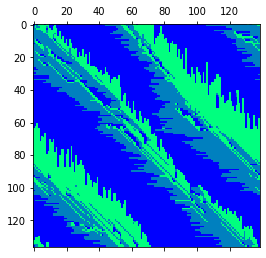

In [198]:
plt.matshow(a, cmap="winter")